In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
%load_ext autoreload  
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import sys
import argparse
import csv
import json
import time
import types, copy, pprint
from datetime import datetime
import numpy as np

if './src' not in sys.path:
    print(f"insert ./src")
    sys.path.insert(0, './src')
print(sys.path)

# import pandas as pd
# pd.options.display.width = 132
from scipy.sparse import csr_matrix

pp = pprint.PrettyPrinter(indent=4)
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=150, nanstr='nan')

# os.environ["WANDB_NOTEBOOK_NAME"] = "Adashare_Train.ipynb"
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

insert ./src
['./src', '/home/kevin/miniforge3/envs/ptsnnl/lib/python311.zip', '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11', '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/lib-dynload', '', '/home/kevin/miniforge3/envs/ptsnnl/lib/python3.11/site-packages']


In [3]:
# print("1- '%x_%X'               : ",time.strftime('%x_%X'))
# print("2- '%X.%f'               : ",datetime.now().strftime('%X.%f'))
# print("3- '%X %x %Z'            : ",time.strftime('%X %x %Z'))
# print("4- '%D-%X.%f'            : ",datetime.now().strftime('%D-%X.%f'))
# print("5- '%Y-%m-%d %H:%M:%S.%f': ",datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f'))
# print("6- '%Y%m%d_%H%M%S'       : ",datetime.now().strftime('%Y%m%d_%H%M%S'))
# print("7- '%Y_%m_%d_%H:%M:%S'   : ",datetime.now().strftime('%Y_%m_%d_%H:%M:%S'))

timestamp = datetime.now().strftime('%Y_%m_%d_%H:%M:%S')
print(' Timestamp: ','./tmp/sql_cohort'+'_'+timestamp+'.txt')

 Timestamp:  ./tmp/sql_cohort_2024_04_01_17:09:58.txt


In [4]:
import os
import logging 
logLevel = os.environ.get('LOG_LEVEL', 'INFO').upper()
FORMAT = '%(asctime)s - %(levelname)s: - %(message)s'
logging.basicConfig(level="INFO", format= FORMAT)


# Setup

In [5]:
import torch
import torch.nn.functional as F
from torchinfo import summary
import os
import shutil
import sys
import getpass
from tqdm import tqdm
from datetime import datetime
print(torch.__version__)

2.2.1+cu118


In [6]:
torch.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=150, profile=None, sci_mode=None)
def _get_device():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print("Running on:", device)
    return device
_get_device()

Running on: cuda


'cuda'

In [36]:
# Soft Nearest Neighbor Loss
# Copyright (C) 2020  Abien Fred Agarap
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as published
# by the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
#
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""Sample module for using DNN classifier with SNNL"""
import argparse

import torch
# from pt_datasets import create_dataloader, load_dataset
# from pt_datasets import display_cellpainting_batch
# from pt_datasets import custom_collate_fn
# from snnl.models import DNN
# from dev_code import Model, DNN, Autoencoder, SNNLoss
from snnl.models import Model, DNN
from snnl.losses import SNNLoss
from snnl.utils import export_results, get_hyperparameters, set_global_seed
from snnl.utils.metrics import accuracy

__author__ = "Abien Fred Agarap"
__version__ = "1.0.0"

'Sample module for using DNN classifier with SNNL'

In [24]:
def parse_args(input = None):
    parser = argparse.ArgumentParser(description="DNN classifier with SNNL")
    group = parser.add_argument_group("Parameters")
    group.add_argument(
        "-s",
        "--seed",
        required=False,
        default=1234,
        type=int,
        help="the random seed value to use, default: [1234]",
    )
    group.add_argument(
        "-m",
        "--model",
        required=False,
        default="baseline",
        type=str,
        help="the model to use, options: [baseline (default) | snnl]",
    )
    group.add_argument(
        "-c",
        "--configuration",
        required=False,
        default="examples/hyperparameters/dnn.json",
        type=str,
        help="the path to the JSON file containing the hyperparameters to use",
    )
    arguments = parser.parse_args(input)
    return arguments

In [25]:
# if __name__ == "__main__":
input_args = f" --seed              1234 " \
             f" --model             baseline" \
             f" --configuration     examples/hyperparameters/dnn_mnist.json"
             # f" --configuration     examples/hyperparameters/dnn_cellpainting.json"
             # f" --model             snnl" \
args = parse_args(input_args.split())

args

Namespace(seed=1234, model='baseline', configuration='examples/hyperparameters/dnn_mnist.json')

#### main(args)

In [26]:
# DNN
(   dataset,
    batch_size,
    epochs,
    learning_rate,
    units,
    snnl_factor,
    temperature,
 ) = get_hyperparameters(args.configuration)

hello dnn 
hello C


In [27]:
# dataset = 'cellpainting'
# units = [[1471, 1024], [1024, 1024], [1024, 512], [512,32] ]
# epochs = 10
# batch_size = 10

In [28]:
print(f"   dataset           {dataset}")
print(f"   batch_size        {batch_size}")
print(f"   epochs            {epochs}")
print(f"   learning_rate     {learning_rate}")
# print(f"   code_dim          {code_dim}")
print(f"   units             {units}")
print(f"   snnl_factor       {snnl_factor}")
print(f"   temperature       {temperature}")


   dataset           mnist
   batch_size        256
   epochs            20
   learning_rate     0.0001
   units             [[784, 500], [500, 500], [500, 2000], [2000, 10]]
   snnl_factor       10.0
   temperature       50.0


#### Load mnist dataset

In [29]:
set_global_seed(args.seed)

In [30]:
if dataset in ["mnist", "emnist"]:
    print(f"load {dataset}")
    train_dataset, test_dataset = load_dataset(name=dataset)

    if dataset == "emnist":
        print(f"dataset is emnist")
        train_features = train_dataset.data.numpy().astype("float32") / 255.0
        train_features = train_features[:60000]
        train_features = torch.from_numpy(train_features)
        train_labels = train_dataset.targets
        train_labels = train_labels[:60000]
        train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    else:
        train_dataset, test_dataset = load_dataset(name=dataset)
        train_features = train_dataset.data.numpy().astype("float32") / 255.0
        # train_features = train_features[:10000]
        train_features = torch.from_numpy(train_features)
        train_labels = train_dataset.targets
        # train_labels = train_labels[:10000]
        train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
        train_loader = create_dataloader(dataset=train_dataset, batch_size=batch_size, num_workers=1)    


load mnist


In [31]:
print(len(train_dataset), len(test_dataset))

60000 10000


#### define DNN model

In [39]:
args.model = "snnl"

In [100]:
if args.model.lower() == "baseline":
    print(f" Build BASELINE model")
    model = DNN(units=units, learning_rate=learning_rate)
    
elif args.model.lower() == "snnl":
    print(f" Build SNNL model")
    model = DNN(
        units=units,
        learning_rate=learning_rate,
        use_snnl=True,
        factor=snnl_factor,
        temperature=temperature,
        use_annealing=False,
    )
else:
    raise ValueError("Choose between [baseline] and [snnl] only.")

 Build SNNL model
 Building Base Model from models/base.py
 Building DNN from models/dnn.py


In [101]:
model.mode
model.snnl_criterion._supported_modes.get(model.mode)
model.temperature
model.snnl_criterion.temperature

'classifier'

False

Parameter containing:
tensor([50.], device='cuda:0', requires_grad=True)

Parameter containing:
tensor([50.], device='cuda:0', requires_grad=True)

#### Display model summary

In [102]:
col_names = [ "input_size",
                "output_size",
                "num_params",
                "params_percent",
                # "kernel_size",
                "mult_adds",
                "trainable"]
if dataset =="cellpainting":
    summary_input_size = (batch_size * cellpainting_args['sample_size'], 1471)
else:
    summary_input_size = (batch_size, 28, 28)
summary(model, input_size=summary_input_size, col_names = col_names)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %                   Mult-Adds                 Trainable
DNN                                      [256, 28, 28]             [256, 10]                 1                           0.00%                   --                        True
├─ModuleList: 1-1                        --                        --                        --                             --                   --                        True
│    └─Linear: 2-1                       [256, 784]                [256, 500]                392,500                    23.57%                   100,480,000               True
│    └─Linear: 2-2                       [256, 500]                [256, 500]                250,500                    15.04%                   64,128,000                True
│    └─Linear: 2-3                       [256, 500]                [256, 2000]               1,002,000             

In [103]:
# for index, layer in enumerate(model.layers):
#     print(f" {index}:  ")
#     print(layer)
#     if isinstance(layer, torch.nn.Linear):
#         print(layer.weight.shape)

### `main()`

In [104]:
epochs = 10

In [105]:
model.fit(data_loader=train_loader, epochs=epochs, show_every =1)

epoch 1/10  |  mean loss = 23.543876  |  mean acc = 0.871692  |  xent loss = 0.486050  |  snn loss = 2.305783  |  temp = 49.912754  |  temp grad = 0.003163 
epoch 2/10  |  mean loss = 23.218951  |  mean acc = 0.949391  |  xent loss = 0.177541  |  snn loss = 2.304141  |  temp = 49.818554  |  temp grad = 0.002887 
epoch 3/10  |  mean loss = 23.167129  |  mean acc = 0.963763  |  xent loss = 0.125849  |  snn loss = 2.304128  |  temp = 49.721825  |  temp grad = 0.003254 
epoch 4/10  |  mean loss = 23.141419  |  mean acc = 0.973199  |  xent loss = 0.095966  |  snn loss = 2.304545  |  temp = 49.623051  |  temp grad = 0.003117 
epoch 5/10  |  mean loss = 23.109316  |  mean acc = 0.978452  |  xent loss = 0.075772  |  snn loss = 2.303354  |  temp = 49.523117  |  temp grad = 0.003098 
epoch 6/10  |  mean loss = 23.103162  |  mean acc = 0.983477  |  xent loss = 0.060807  |  snn loss = 2.304235  |  temp = 49.422253  |  temp grad = 0.003745 
epoch 7/10  |  mean loss = 23.085966  |  mean acc = 0.9857

In [38]:
test_features = test_dataset.data.reshape(-1, 784) / 255.0
model.eval()
model = model.cpu()
predictions = model.predict(test_features)
model.test_accuracy = accuracy(y_true=test_dataset.targets, y_pred=predictions)
print(f"accuracy: {model.test_accuracy}%")
# filename = f"DNN-{args.model.lower()}-{args.seed}.json"
# export_results(model=model, filename=filename)

DNN(
  (snnl_criterion): SNNLoss(
    (primary_criterion): CrossEntropyLoss()
  )
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): Linear(in_features=500, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=2000, bias=True)
    (3): Linear(in_features=2000, out_features=10, bias=True)
  )
)

accuracy: 98.03%


### Plot losses

In [44]:
model.train_loss
model.train_xent_loss
model.train_snn_loss

[23.557433570699487,
 23.22307972197837,
 23.17047405648739,
 23.135906503555624,
 23.111685691995824,
 23.109949184985872,
 23.07896597841953,
 23.061786400003637,
 23.07139054156364,
 23.056032813863553,
 23.049738750051944,
 23.052576990330472,
 23.038166687336375,
 23.038574340495657,
 23.027512424550157,
 23.02489833425968,
 23.02663789302745,
 23.02926631683999,
 23.033775702943192,
 23.02313812742842]

[0.49108011716223776,
 0.17844487679131488,
 0.12760246721036891,
 0.09754291860030052,
 0.07894913333052016,
 0.06346336329712512,
 0.05217743678454389,
 0.04229577096139497,
 0.03541186782036056,
 0.0296313617893673,
 0.02414795395303914,
 0.02002955710396488,
 0.01666371603991757,
 0.014435368990327449,
 0.010814445992892092,
 0.009346916684088238,
 0.007567327370510456,
 0.0064481989936308656,
 0.005928901349134902,
 0.004381614105597614]

[2.3066353371802797,
 2.3044634859612647,
 2.3042871525947084,
 2.3038363608908146,
 2.3032736605786264,
 2.304648591102438,
 2.302678856951125,
 2.3019490668114195,
 2.30359786520613,
 2.3026401469048032,
 2.302559077486079,
 2.3032547433325585,
 2.302150297164917,
 2.302413892745972,
 2.3016697934333314,
 2.3015551394604623,
 2.301907053399593,
 2.3022818159549794,
 2.3027846833492847,
 2.301875660267282]

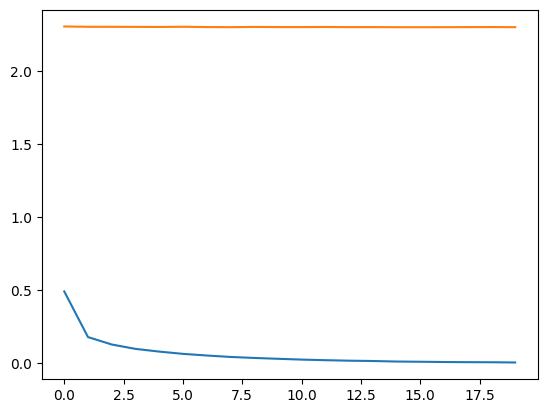

In [48]:
from matplotlib import pyplot as plt

plt.plot(model.train_xent_loss)
plt.plot(model.train_snn_loss)

### `model.fit(data_loader=train_loader, epochs=epochs)`

In [21]:
# def fit(
#     self, data_loader: torch.utils.data.DataLoader, epochs: int, show_every: int = 2
# ) -> None:

In [22]:
if model.use_snnl:
    model.train_snn_loss = []
    model.train_xent_loss = []
epoch = 0

In [23]:
print(f" epoch {epoch}  of {epochs} epochs")
# for epoch in range(epochs):
# epoch +=1
if model.use_snnl:
    data_loader = train_loader
    

 epoch 0  of 20 epochs


  #### Call epoch_train

In [31]:
# *epoch_loss, epoch_accuracy = self.epoch_train(data_loader, epoch)

 #### After return from epoch_train

In [32]:
model.train_loss.append(epoch_loss[0])
model.train_snn_loss.append(epoch_loss[1])
model.train_xent_loss.append(epoch_loss[2])
model.train_accuracy.append(epoch_accuracy)
if (epoch + 1) % show_every == 0:
    print(f"epoch {epoch + 1}/{epochs}")
    print(
        f"\tmean loss = {model.train_loss[-1]:.6f}\t|\tmean acc = {model.train_accuracy[-1]:.6f}"
    )
    print(
        f"\txent loss = {model.train_xent_loss[-1]:.6f}\t|\tsnn loss = {model.train_snn_loss[-1]:.6f}"
    )

NameError: name 'epoch_loss' is not defined

In [ ]:
# if model.use_snnl:
#     *epoch_loss, epoch_accuracy = model.epoch_train(data_loader, epoch)
#     model.train_loss.append(epoch_loss[0])
#     model.train_snn_loss.append(epoch_loss[1])
#     model.train_xent_loss.append(epoch_loss[2])
#     model.train_accuracy.append(epoch_accuracy)
#     if (epoch + 1) % show_every == 0:
#         print(f"epoch {epoch + 1}/{epochs}")
#         print(
#             f"\tmean loss = {model.train_loss[-1]:.6f}\t|\tmean acc = {model.train_accuracy[-1]:.6f}"
#         )
#         print(
#             f"\txent loss = {model.train_xent_loss[-1]:.6f}\t|\tsnn loss = {model.train_snn_loss[-1]:.6f}"
#         )
# else:
#     epoch_loss, epoch_accuracy = model.epoch_train(data_loader)
#     model.train_loss.append(epoch_loss)
#     model.train_accuracy.append(epoch_accuracy)
#     if (epoch + 1) % show_every == 0:
#         print(f"epoch {epoch + 1}/{epochs}")
#         print(
#             f"\tmean loss = {model.train_loss[-1]:.6f}\t|\tmean acc = {model.train_accuracy[-1]:.6f}"
#         )

In [ ]:
if type(epoch_loss) is tuple:
    self.train_loss.append(epoch_loss[0])
    self.train_snn_loss.append(epoch_loss[1])
    self.train_recon_loss.append(epoch_loss[2])
    if (epoch + 1) % show_every == 0:
        print(f"epoch {epoch + 1}/{epochs} : mean loss = {self.train_loss[-1]:.6f}")
        print(f"\trecon loss = {self.train_recon_loss[-1]:.6f}\t|\tsnn loss = {self.train_snn_loss[-1]:.6f}")
else:
    self.train_loss.append(epoch_loss)
    if (epoch + 1) % show_every == 0:
        print(f"epoch {epoch + 1}/{epochs} : mean loss = {self.train_loss[-1]:.6f}")

In [ ]:
# epoch +=1

### `epoch_train(self, data_loader, epoch)`

In [24]:
    # def epoch_train(
    #     self, data_loader: torch.utils.data.DataLoader, epoch: int = None
    # ) -> Tuple:

In [25]:
if model.use_snnl:
    epoch_primary_loss = 0
    epoch_snn_loss = 0
if model.name == "DNN" or model.name == "CNN":
    epoch_accuracy = 0
epoch_loss = 0

In [26]:
# for batch_features, batch_labels in data_loader:

# _,_,_,batch_features_numpy, batch_labels_numpy = next(iter(data_loader))
batch_features, batch_labels = next(iter(data_loader))

## If cellpainting output is numpy 
if dataset == "cellpainting":
    batch_features_numpy = np.asarray(batch_features).copy()
    batch_labels_numpy = np.asarray(batch_labels).copy()
    type(batch_features_numpy), type(batch_labels_numpy)
    # batch_labels_numpy = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], dtype=object)
    batch_features = torch.from_numpy(batch_features_numpy)
    batch_labels = torch.from_numpy(batch_labels_numpy.astype(np.uint8))
    print(f" batch features {type(batch_features)}  {batch_features.shape}   batch_labels: {type(batch_labels)}{batch_labels.shape}")

if model.name in ["Autoencoder", "DNN"]:
    batch_features = batch_features.view(batch_features.shape[0], -1)
    print(f" batch features shape is : {batch_features.shape}")

print(f" batch labels shape is : {batch_features.shape}")    
print(batch_labels)

batch_features = batch_features.to(model.device)
batch_labels = batch_labels.to(model.device)

model.optimizer.zero_grad()

outputs = model.forward(features=batch_features)

outputs.shape

 batch features shape is : torch.Size([10, 784])
 batch labels shape is : torch.Size([10, 784])
tensor([1, 6, 8, 7, 7, 0, 9, 9, 4, 0])


torch.Size([10, 10])

In [27]:
outputs[:10,:]

tensor([[-4.3358e-01,  3.9948e-02,  4.7576e-01,  5.4515e-01, -4.6906e-01, -3.3573e-01, -6.0311e-01,  4.0448e-01,  4.1900e-01, -1.3331e-01],
        [-8.4064e-01, -3.0611e-01,  4.4865e-01,  4.4642e-01,  2.6245e-01, -1.0823e+00, -7.0714e-01,  8.5428e-01,  1.0879e+00, -4.4256e-01],
        [-5.9724e-01, -6.3445e-01,  1.9729e-01,  9.3299e-01, -5.0995e-01, -5.8153e-01, -1.2104e+00,  7.8381e-01,  6.6207e-01, -2.0520e-01],
        [-2.7482e-01, -1.0462e-01,  2.1403e-01,  3.8138e-01, -7.5020e-01, -1.2294e-02, -5.0256e-01,  5.8192e-01,  4.4356e-01, -4.3138e-01],
        [-1.3463e-01, -8.0503e-02,  2.1400e-01,  3.9957e-01, -6.6884e-01, -2.2355e-01, -8.0680e-02,  1.3588e-02,  1.4350e-01, -5.8696e-01],
        [-5.7113e-01, -2.7187e-01,  9.7609e-02,  8.8507e-01,  2.7426e-03, -7.8434e-01, -7.6095e-01,  1.1146e+00,  7.7323e-01, -3.0842e-01],
        [-2.1292e-01, -6.3457e-01,  7.6484e-02,  3.8227e-01, -3.6587e-01, -6.3499e-01, -5.8718e-01,  7.8421e-01,  7.0257e-01, -2.1207e-01],
        [-2.4233e-01

In [42]:
model.snnl_criterion = SNNLoss(
    mode=model.mode,
    # criterion=criterion,
    factor=model.factor,
    temperature=model.temperature,
    use_annealing=model.use_annealing,
    use_sum=model.use_sum,
    code_units=model.code_units,
    stability_epsilon=model.stability_epsilon,
)

 Build SNNLoss dfrom NOTEBOOK


In [43]:
if model.use_snnl:
    train_loss, primary_loss, snn_loss = model.snnl_criterion(
        model=model,
        outputs=outputs,
        features=batch_features,
        labels=batch_labels,
        epoch=epoch,
    )
    print(f" train_loss {train_loss}, primary loss: {primary_loss}, SNN loss : {snn_loss}")
    





 train_loss 61.71257019042969, primary loss: 2.5271217823028564, SNN loss : 5.918544769287109


In [31]:
epoch_loss += train_loss.item()
epoch_snn_loss += snn_loss.item()
epoch_primary_loss += primary_loss.item()

In [30]:
if not model.use_snnl:
    train_loss = model.criterion(outputs,
                                 batch_labels if model.name == "DNN" or model.name == "CNN"  else batch_features,)
    epoch_loss += train_loss.item()

In [37]:
print(f" epoch_loss             {epoch_loss}")
print(f" epoch_snn_loss         {epoch_snn_loss}   factor: {model.factor}")
print(f" epoch_primary_loss     {epoch_primary_loss}")

 epoch_loss             61.71257019042969
 epoch_snn_loss         5.918544769287109   factor: 10.0
 epoch_primary_loss     2.5271217823028564


In [173]:
# if model.name == "DNN" or model.name == "CNN":
#     train_accuracy = (outputs.argmax(1) == batch_labels).sum().item() / len(batch_labels)
#     epoch_accuracy += train_accuracy

In [174]:
train_loss.backward()

model.optimizer.step()

if model.use_snnl and model.temperature is not None:
    model.optimize_temperature()

    # break

In [175]:
model.temperature

Parameter containing:
tensor([49.9991], device='cuda:0', requires_grad=True)

#### End of dataloader loop

In [177]:
epoch_loss
outputs.shape
# outputs[0].data
# outputs[1].data
batch_labels[0]
batch_labels[1]
epoch_loss
epoch_snn_loss
epoch_primary_loss
(outputs.argmax(1) == batch_labels).sum().item()
# len(batch_labels)
# train_accuracy
# epoch_accuracy
# len(data_loader)

activations = dict()
layers = model.layers
for index, layer in enumerate(layers):
    if index == 0:
        activations[index] = layer(batch_features)
    else:
        activations[index] = layer(activations[index - 1])

for i in activations:
    print(activations[i].shape)

186.37106275558472

torch.Size([12, 32])

tensor(1, device='cuda:0', dtype=torch.uint8)

tensor(1, device='cuda:0', dtype=torch.uint8)

186.37106275558472

15.319163958272838

33.17942261695862

5

torch.Size([12, 1024])
torch.Size([12, 1024])
torch.Size([12, 512])
torch.Size([12, 32])


In [178]:
epoch_loss /= len(data_loader)

if model.name in ["DNN", "CNN"]:
    epoch_accuracy /= len(data_loader)

if model.use_snnl:
    epoch_snn_loss /= len(data_loader)
    epoch_primary_loss /= len(data_loader)
    if model.name == "DNN" or model.name == "CNN":
        print(f" epoch_loss: {epoch_loss},  epoch_snn_loss: {epoch_snn_loss}, epoch_primaey_loss: {epoch_primary_loss}, accuracy: {epoch_accuracy} ")
        return epoch_loss, epoch_snn_loss, epoch_primary_loss, epoch_accuracy
    else:
        print(f" epoch_loss: {epoch_loss},  epoch_snn_loss: {epoch_snn_loss}, epoch_primary_loss: {epoch_primary_loss} ")
        return epoch_loss, epoch_snn_loss, epoch_primary_loss
else:
    if model.name == "DNN" or model.name == "CNN":
        print(f" epoch_loss: {epoch_loss}, accuracy: {epoch_accuracy} ")
        return epoch_loss, epoch_accuracy
    else:
        print(f" epoch_loss: {epoch_loss},")
        return epoch_loss

TypeError: object of type 'CellpaintingDataset' has no len()

In [ ]:
# def main(args):
#     (
#         dataset,
#         batch_size,
#         epochs,
#         learning_rate,
#         units,
#         snnl_factor,
#         temperature,
#     ) = get_hyperparameters(args.configuration)

#     set_global_seed(args.seed)

#     train_dataset, test_dataset = load_dataset(name=dataset)
#     if dataset == "emnist":
#         train_features = train_dataset.data.numpy().astype("float32") / 255.0
#         train_features = train_features[:60000]
#         train_features = torch.from_numpy(train_features)
#         train_labels = train_dataset.targets
#         train_labels = train_labels[:60000]
#         train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
#     train_loader = create_dataloader(dataset=train_dataset, batch_size=batch_size)

#     if args.model.lower() == "baseline":
#         model = DNN(units=units, learning_rate=learning_rate)
#     elif args.model.lower() == "snnl":
#         model = DNN(
#             units=units,
#             learning_rate=learning_rate,
#             use_snnl=True,
#             factor=snnl_factor,
#             temperature=temperature,
#             use_annealing=False,
#         )
#     else:
#         raise ValueError("Choose between [baseline] and [snnl] only.")

#     model.fit(data_loader=train_loader, epochs=epochs)

#     test_features = test_dataset.data.reshape(-1, 784) / 255.0
#     model.eval()
#     model = model.cpu()
#     predictions = model.predict(test_features)
#     model.test_accuracy = accuracy(y_true=test_dataset.targets, y_pred=predictions)
#     print(f"accuracy: {model.test_accuracy}%")
#     filename = f"DNN-{args.model.lower()}-{args.seed}.json"
#     export_results(model=model, filename=filename)



#### SNNL Loss

In [154]:
snnl = SNNLoss(temperature=1.0)

 Build SNNLoss dfrom NOTEBOOK


In [170]:
_ = torch.manual_seed(42)
features = torch.rand((6, 4))
features

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])

In [171]:
distance_matrix = snnl.pairwise_cosine_distance(features)
distance_matrix

tensor([[-1.1921e-07,  2.6181e-02,  2.1361e-01,  1.0087e-01,  2.2940e-02,  7.3328e-02],
        [ 2.6181e-02,  0.0000e+00,  2.7807e-01,  1.8148e-01,  9.0106e-02,  1.6577e-02],
        [ 2.1361e-01,  2.7807e-01,  5.9605e-08,  6.2519e-02,  1.6466e-01,  2.7426e-01],
        [ 1.0087e-01,  1.8148e-01,  6.2519e-02,  0.0000e+00,  7.5882e-02,  2.2894e-01],
        [ 2.2940e-02,  9.0106e-02,  1.6466e-01,  7.5882e-02,  1.1921e-07,  1.4981e-01],
        [ 7.3328e-02,  1.6577e-02,  2.7426e-01,  2.2894e-01,  1.4981e-01,  0.0000e+00]])

In [173]:
pairwise_distance_matrix = snnl.normalize_distance_matrix(features, distance_matrix, device = 'cpu')
torch.exp(-(distance_matrix / snnl.temperature)) 
# pairwise_distance_matrix = torch.exp(-(distance_matrix / snnl.temperature)) - torch.eye(features.shape[0])
# pairwise_distance_matrix.sum(1)   
pairwise_distance_matrix

tensor([[1.0000, 0.9742, 0.8077, 0.9041, 0.9773, 0.9293],
        [0.9742, 1.0000, 0.7572, 0.8340, 0.9138, 0.9836],
        [0.8077, 0.7572, 1.0000, 0.9394, 0.8482, 0.7601],
        [0.9041, 0.8340, 0.9394, 1.0000, 0.9269, 0.7954],
        [0.9773, 0.9138, 0.8482, 0.9269, 1.0000, 0.8609],
        [0.9293, 0.9836, 0.7601, 0.7954, 0.8609, 1.0000]])

tensor([[ 1.1921e-07,  9.7416e-01,  8.0767e-01,  9.0405e-01,  9.7732e-01,  9.2930e-01],
        [ 9.7416e-01,  0.0000e+00,  7.5725e-01,  8.3404e-01,  9.1383e-01,  9.8356e-01],
        [ 8.0767e-01,  7.5725e-01, -5.9605e-08,  9.3940e-01,  8.4818e-01,  7.6013e-01],
        [ 9.0405e-01,  8.3404e-01,  9.3940e-01,  0.0000e+00,  9.2693e-01,  7.9538e-01],
        [ 9.7732e-01,  9.1383e-01,  8.4818e-01,  9.2693e-01, -1.1921e-07,  8.6087e-01],
        [ 9.2930e-01,  9.8356e-01,  7.6013e-01,  7.9538e-01,  8.6087e-01,  0.0000e+00]])

In [174]:
# torch.sum(pairwise_distance_matrix, 1) ##.view(-1, 1)
# pairwise_distance_matrix / (1.0e-8 + torch.sum(pairwise_distance_matrix, 1).view(-1, 1))

sampling_probability = snnl.compute_sampling_probability(pairwise_distance_matrix)
sampling_probability.sum(1)
sampling_probability

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

tensor([[ 2.5957e-08,  2.1212e-01,  1.7587e-01,  1.9685e-01,  2.1281e-01,  2.0235e-01],
        [ 2.1828e-01,  0.0000e+00,  1.6968e-01,  1.8688e-01,  2.0476e-01,  2.2039e-01],
        [ 1.9639e-01,  1.8413e-01, -1.4493e-08,  2.2842e-01,  2.0624e-01,  1.8483e-01],
        [ 2.0548e-01,  1.8956e-01,  2.1351e-01,  0.0000e+00,  2.1067e-01,  1.8078e-01],
        [ 2.1588e-01,  2.0186e-01,  1.8735e-01,  2.0475e-01, -2.6332e-08,  1.9016e-01],
        [ 2.1466e-01,  2.2719e-01,  1.7558e-01,  1.8372e-01,  1.9885e-01,  0.0000e+00]])

In [175]:
labels = torch.tensor([0,0,1,1,2,2])
# labels +=3
labels
labels.unsqueeze(1)
torch.eq(labels, labels.unsqueeze(1))

tensor([0, 0, 1, 1, 2, 2])

tensor([[0],
        [0],
        [1],
        [1],
        [2],
        [2]])

tensor([[ True,  True, False, False, False, False],
        [ True,  True, False, False, False, False],
        [False, False,  True,  True, False, False],
        [False, False,  True,  True, False, False],
        [False, False, False, False,  True,  True],
        [False, False, False, False,  True,  True]])

In [176]:
summed_masked_pick_probability = snnl.mask_sampling_probability(labels, sampling_probability)
# summed_masked_pick_probability.sum(0)
summed_masked_pick_probability

masking_matrix
tensor([[1., 1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 1.]])
masked_pick_probabliltiy
tensor([[ 2.5957e-08,  2.1212e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 2.1828e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.4493e-08,  2.2842e-01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  2.1351e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.6332e-08,  1.9016e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.9885e-01,  0.0000e+00]])


tensor([0.2121, 0.2183, 0.2284, 0.2135, 0.1902, 0.1988])

#### Base Model

#### DNN

#### Autoencoder

#### Predict

In [ ]:
test_features = test_dataset.data.reshape(-1, 784) / 255.0

In [ ]:
model.eval()
model = model.cpu()

In [ ]:
predictions = model.predict(test_features)
model.test_accuracy = accuracy(y_true=test_dataset.targets, y_pred=predictions)

In [ ]:
print(f"accuracy: {model.test_accuracy}%")

In [ ]:
print(f"accuracy: {model.test_accuracy}%")

In [ ]:
print(f"accuracy: {model.test_accuracy}%")

In [ ]:
filename = f"DNN-{args.model.lower()}-{args.seed}.json"
export_results(model=model, filename=filename)